In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
from common_import import *

/home/hrai/miniconda3/envs/motionbert/lib/python3.9/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [ ]:
data_type_list = ['source_list', 'cam_param',
                  'cam_3d', 'img_2d',
                  'img_3d', 'scale_factor', 'img_25d',
                  ]
overwrite_list = []
dataset_name = 'h36m'
data_aug = default_data_aug.copy()
data = load_data_dict(dataset_name, data_type_list, overwrite_list, verbose=True, data_aug=data_aug)

[overwrite: False] ==> Loading H36M source_list...
[overwrite: False] ==> Loading H36M cam_param...
[overwrite: False] ==> Loading H36M cam_3d...
[overwrite: False] ==> Loading H36M img_2d...
[overwrite: False] ==> Loading H36M img_3d...
[overwrite: False] ==> Loading H36M scale_factor...
[overwrite: False] ==> Loading H36M img_25d...


In [2]:
data_path = '/home/hrai/codes/MotionBERT/data/motion3d/h36m_sh_conf_cam_source_final.pkl'
h36m_sh = readpkl(data_path)

In [3]:
h36m_sh.keys()

dict_keys(['train', 'test'])

In [4]:
h36m_sh['train'].keys()

dict_keys(['joint_2d', 'confidence', 'joint3d_image', 'camera_name', 'source'])

In [5]:
h36m_sh['test'].keys()

dict_keys(['joint_2d', 'confidence', 'joint3d_image', 'joints_2.5d_image', '2.5d_factor', 'camera_name', 'action', 'source'])

In [53]:
set(list(h36m_sh['test']['action']))

{'Direction',
 'Discuss',
 'Eating',
 'Greet',
 'Phone',
 'Photo',
 'Pose',
 'Purchase',
 'Sitting',
 'SittingDown',
 'Smoke',
 'Wait',
 'Walk',
 'WalkDog',
 'WalkTwo'}

In [56]:
h36m_sh['test']['action'] == 'Walk'

False

In [89]:
np.where(np.array(h36m_sh['test']['action']) == 'Walk')[0]

array([287436, 287437, 287438, ..., 543817, 543818, 543819])

In [91]:
np.where(np.array(h36m_sh['test']['source']) == 's_09_act_14_subact_01_ca_01')[0].shape

(2446,)

In [121]:
frame_num = 287436 + 1000
source_h36m_sh = h36m_sh['test']['source'][frame_num]
subject = f"S{int(source_h36m_sh.split('_')[1])}"
action = h36m_sh['test']['action'][frame_num]
cam_id = h36m_sh['test']['camera_name'][frame_num]
joint_2d = h36m_sh['test']['joint_2d'][frame_num]
joint3d_image = h36m_sh['test']['joint3d_image'][frame_num]
joint3d_image_hat = joint3d_image.copy() - joint3d_image[0]
joints_25d_image = h36m_sh['test']['joints_2.5d_image'][frame_num]
joints_25d_image_hat = joints_25d_image.copy() - joints_25d_image[0]
_25d_factor = h36m_sh['test']['2.5d_factor'][frame_num]

joint3d_image_norm = normalize_input(joint3d_image, 1000, 1000)
joint_2d_norm = normalize_input(joint_2d, 1000, 1000)

source_h36m_sh, subject, cam_id, action, _25d_factor

('s_09_act_14_subact_01_ca_01', 'S9', '55011271', 'Walk', 4.162437)

In [65]:
joint3d_image_hat * _25d_factor - joints_25d_image_hat

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.81469727e-05, -1.90734863e-06],
       [ 1.52587891e-05, -3.05175781e-05,  7.62939453e-06],
       [ 0.00000000e+00,  1.22070312e-04,  3.05175781e-05],
       [ 3.05175781e-05, -3.62396240e-05,  1.90734863e-06],
       [-9.15527344e-05, -3.05175781e-05, -1.90734863e-06],
       [ 6.67572021e-06,  0.00000000e+00,  7.62939453e-06],
       [ 5.72204590e-06, -7.62939453e-05,  0.00000000e+00],
       [ 1.04904175e-05,  0.00000000e+00, -7.62939453e-06],
       [-2.28881836e-05,  0.00000000e+00, -1.52587891e-05],
       [ 4.05311584e-06, -6.10351562e-05, -1.52587891e-05],
       [ 0.00000000e+00, -3.05175781e-05, -3.81469727e-06],
       [-9.15527344e-05, -1.06811523e-04,  3.81469727e-06],
       [ 6.10351562e-05, -1.22070312e-04,  0.00000000e+00],
       [-1.52587891e-05,  0.00000000e+00,  0.00000000e+00],
       [-3.05175781e-05, -6.10351562e-05, -1.52587891e-05],
       [-1.52587891e-05,  6.48498535e-05

In [67]:
data['cam_3d'][subject].keys()

dict_keys(['Waiting 1', 'Sitting', 'Photo 1', 'Smoking', 'WalkTogether 1', 'Discussion 2', 'Greeting 1', 'Phoning', 'Phoning 1', 'Smoking 1', 'Discussion 1', 'WalkTogether', 'Sitting 1', 'SittingDown', 'Directions', 'SittingDown 1', 'Directions 1', 'Purchases', 'Walking 1', 'WalkDog 1', 'Waiting', 'Walking', 'Eating', 'Posing', 'Greeting', 'Posing 1', 'WalkDog', 'Photo', 'Purchases 1', 'Eating 1'])

In [101]:
data['cam_3d'][subject]['Walking 1'].keys()

dict_keys(['54138969', '60457274', '55011271', '58860488'])

In [92]:
len(data['cam_3d'][subject]['Walking 1'][cam_id])

2446

In [96]:
cam_param

{'intrinsic': array([[1.14967570e+03, 0.00000000e+00, 5.08848622e+02],
        [0.00000000e+00, 1.14759162e+03, 5.08064917e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 'extrinsic': array([[ 0.93157205,  0.36348288, -0.00732918,  0.0191931 ],
        [ 0.06810069, -0.19426748, -0.97858185,  0.40422843],
        [-0.35712157,  0.91112038, -0.20572759,  5.70216928]]),
 'C': array([ 1.99095966, -5.12381055,  1.56880482]),
 'R': array([[ 0.93157205,  0.36348288, -0.00732918],
        [ 0.06810069, -0.19426748, -0.97858185],
        [-0.35712157,  0.91112038, -0.20572759]]),
 't': array([0.0191931 , 0.40422843, 5.70216928]),
 'W': 1000,
 'H': 1000,
 'num_frames': 2446}

In [118]:
frame_num = 1003
action = 'Walking 1'
cam_id = '54138969'
cam_3d = data['cam_3d'][subject][action][cam_id][frame_num].copy()
cam_param = data['cam_param'][subject][action][cam_id].copy()
intrinsic = cam_param['intrinsic']
W, H = cam_param['W'], cam_param['H']
cam_3d_hat = cam_3d.copy() - cam_3d[0]
img_2d = projection(cam_3d, intrinsic)
img_2d_norm = normalize_input(img_2d, W, H)

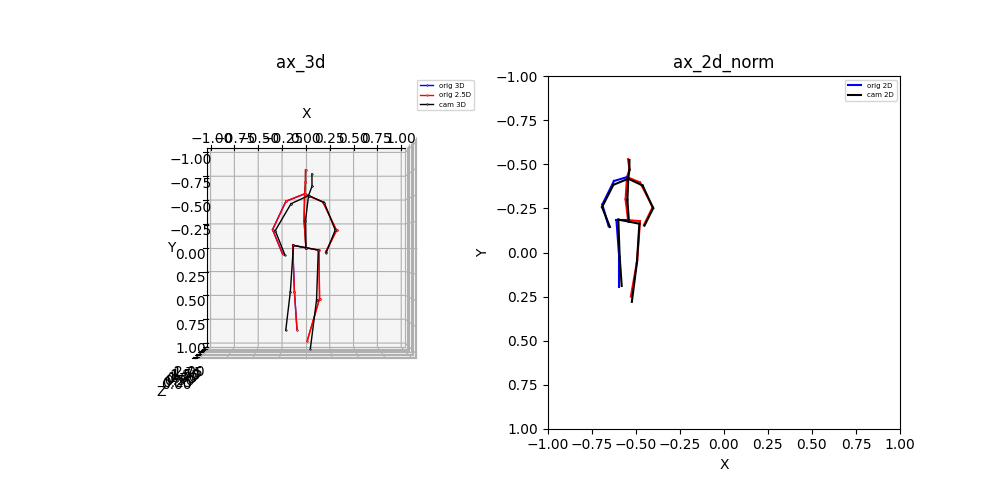

In [119]:
%matplotlib widget
# check original train data

configs = {
    'ax_3d': {'type': '3d', 'loc': 121, 'mode': 'cam', 'xlim': [-1, 1], 'ylim': [-1, 1], 'zlim': [0, 2]},
    #'ax_2d': {'type': '2d', 'loc': 122, 'W': W, 'H': H},
    'ax_2d_norm': {'type': '2d', 'loc': 122, 'normalize': True},
}

fig, axs = generate_axes(0, configs, figsize=[10, 5], fig_title='')
plot_pose_setting = [
    ('ax_3d', joint3d_image_hat*_25d_factor/1000, {'color': '', 'label': 'orig 3D'}),
    ('ax_3d', joints_25d_image_hat/1000, {'color': 'r', 'label': 'orig 2.5D'}),
    ('ax_3d', cam_3d_hat, {'color': 'k', 'label': 'cam 3D'}),
    ('ax_2d_norm', joint_2d_norm, {'color': '', 'label': 'orig 2D'}),
    ('ax_2d_norm', img_2d_norm, {'color': 'k', 'label': 'cam 2D'}),
]
general_plot_func(axs, configs, plot_pose_setting, 0)
plt.show()

's_09_act_02_subact_01_ca_01'